In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
%matplotlib inline

In [2]:
df = pd.read_csv ('SocialNetworkAds.csv')
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


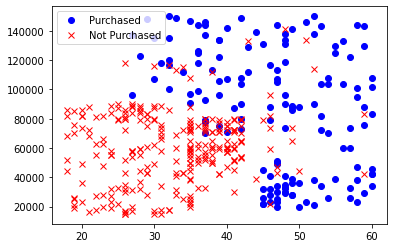

In [3]:
bool1 = df['Purchased'] == 1
bool2 = df['Purchased'] == 0

isp = df[bool1] #ispurchased
nop = df[bool2] #notpurchased


plt.plot(isp.loc[:,"Age"], isp.loc[:,"EstimatedSalary"], color='blue', marker='o',linestyle = "none", label = "Purchased" )
plt.plot(nop.loc[:,"Age"], nop.loc[:,"EstimatedSalary"], color='red', marker='x',linestyle = "none", label = "Not Purchased")
plt.legend()

In [4]:
from sklearn . linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

all = df
people = all
people.dropna()
x = np.array([all["Age"].tolist(),all["EstimatedSalary"].tolist(),])
fx = people["Purchased"].tolist()
x = x.transpose()
x.shape

(400, 2)

In [5]:
clf = KNeighborsClassifier(n_neighbors=4) #K = 10
clf.fit(x, fx)

KNeighborsClassifier(n_neighbors=4)

In [6]:
ages = [x for x in range(0,64,2) for z in range(0,150000,8000)]
money = [y  for z in range(0,64,2) for y in range(0,150000,8000)]
print(len(ages))
print(len(money))
data = {'Age' : list(ages), 'EstimatedSalary' : list(money)}
nf = pd.DataFrame(data)
nf

608
608


,Age,EstimatedSalary
0,0,0
1,0,8000
2,0,16000
3,0,24000
4,0,32000
...,...,...
603,62,112000
604,62,120000
605,62,128000
606,62,136000


In [7]:
bozo = [nf["Age"].tolist(),nf["EstimatedSalary"].tolist()]
bozo = np.array(bozo)
bozo = bozo.transpose()
bozo.shape
results = clf.predict(bozo)

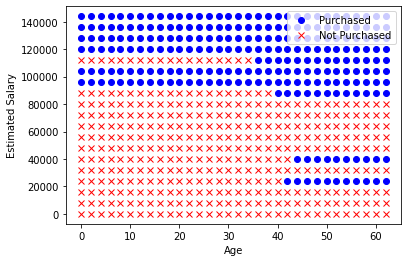

In [8]:

nf['predicted_value'] = results
nf

bool11 = nf['predicted_value'] == 1
bool21 = nf['predicted_value'] == 0

isp2 = nf[bool11] #ispurchased
nop2 = nf[bool21] #notpurchased


plt.plot(isp2.loc[:,"Age"], isp2.loc[:,"EstimatedSalary"], color='blue', marker='o',linestyle = "none", label = "Purchased" )
plt.plot(nop2.loc[:,"Age"], nop2.loc[:,"EstimatedSalary"], color='red', marker='x',linestyle = "none", label = "Not Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()


Lab 2 

four subsets of the data are:

ages where output is 0

ages where output is 1

est $ where output is 0

est $ where output is 1

 

each subset:

calculate mean and standard deviation

 

plot an overlay:

histogram, and Gaussian

...for each subest

 

matplotlib

hist() will plot a histogram

option: density=True

otherwise the y-scale will not match

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [10]:
nop_ages = nop.loc[:,"Age"] #age for zero 
isp_ages = isp.loc[:,"Age"]  #age for 1
nop_sal = nop.loc[:,"EstimatedSalary"] #salary for zero
isp_sal = isp.loc[:,"EstimatedSalary"] #salary for one


Ages for Consumers Who Did Not Make Purchases
Mean: 32.793774319066145
Standard Deviation: 7.970292614059874




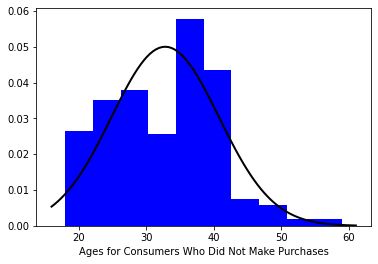

Ages for Consumers Who Made Purchases
Mean: 46.39160839160839
Standard Deviation: 8.582006680946927


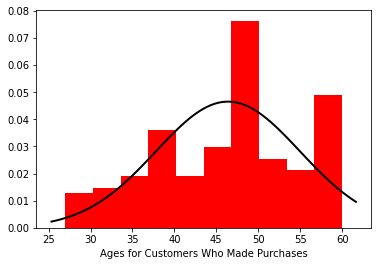

Estimated Salary for Customers Who Did Not Make Purchases
Mean: 60544.74708171206
Standard Deviation: 24304.14733055277


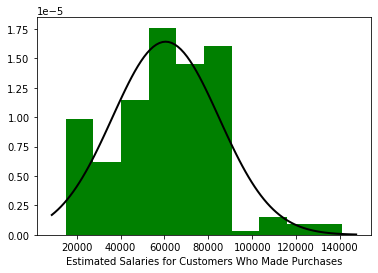

Estimated Salaries for Customers Who Made Purchases
Mean: 86272.72727272728
Standard Deviation: 41916.864409597874


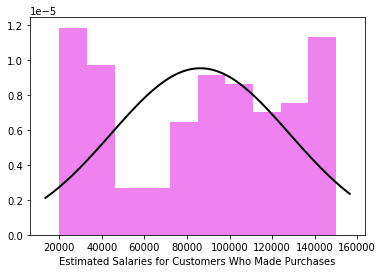

In [11]:
print("Ages for Consumers Who Did Not Make Purchases")
print("Mean: " + str(np.mean(nop_ages)))
print("Standard Deviation: " + str(np.std(nop_ages)))
print()
print()
plt.hist(nop_ages, color = 'blue', density = True)
plt.xlabel("Ages for Consumers Who Did Not Make Purchases")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(nop_ages), np.std(nop_ages))
plt.plot(x, p, 'k', linewidth=2)
plt.show()



print("Ages for Consumers Who Made Purchases")
print("Mean: " + str(np.mean(isp_ages)))
print("Standard Deviation: " + str(np.std(isp_ages)))
plt.hist(isp_ages, color = 'red', density = True)
plt.xlabel("Ages for Customers Who Made Purchases")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(isp_ages), np.std(isp_ages))
plt.plot(x, p, 'k', linewidth=2)
plt.show()


print("Estimated Salary for Customers Who Did Not Make Purchases")
print("Mean: " + str(np.mean(nop_sal)))
print("Standard Deviation: " + str(np.std(nop_sal)))
plt.hist(nop_sal, color = 'green', density = True)
plt.xlabel("Estimated Salaries for Customers Who Made Purchases")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(nop_sal), np.std(nop_sal))
plt.plot(x, p, 'k', linewidth=2)
plt.show()


print("Estimated Salaries for Customers Who Made Purchases")
print("Mean: " + str(np.mean(isp_sal)))
print("Standard Deviation: " + str(np.std(isp_sal)))
plt.hist(isp_sal, color = 'violet', density = True)
plt.xlabel("Estimated Salaries for Customers Who Made Purchases")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(isp_sal), np.std(isp_sal))
plt.plot(x, p, 'k', linewidth=2)
plt.show()

In [12]:
mean_nop_ages = np.mean(nop_ages)
sd_nop_ages = np.std(nop_ages)

mean_isp_ages = np.mean(isp_ages)
sd_isp_ages = np.std(isp_ages)

mean_nop_sal = np.mean(nop_sal)
sd_nop_sal = np.std(nop_sal)

mean_isp_sal= np.mean(isp_sal)
sd_isp_sal = np.std(isp_sal)


both P(output=0) and P(output=1) are easy

- find n0, the number of 0 outputs in the dataset

- find n1, the number of 1 outputs in the dataset

- then n = n0 + n1 = 400

- and P(output=0) = n0 / n

- and P(output=1) = n1 / n

In [13]:
n0 = len(nop_sal)
n1 = len(isp_sal)
n = n0 + n1
p_zero = n0/n
p_one = n1/n

*** the conditional probabilities use the independence assumption ***

P(x1,x2 | output=0) = P(x1 | output=0) * P(x2 | output=0)

P(x1,x2 | output=1) = P(x1 | output=1) * P(x2 | output=1)

but...

P(x1 | output=0) etc are exactly the Gaussian curves we already found!!!

if...

T0 = P(output=0) * P(x1 | output=0) * P(x2 | output=0)

T1 = P(output=1) * P(x1 | output=1) * P(x2 | output=1)

then...

P(output=0 | x1,x2) = T0 / (T0 + T1)

P(output=1 | x1,x2) = T1 / (T0 + T1)

where...

T0 + T1 = P(x1,x2) is the total probability of input (x1,x2)

In [14]:
import math
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [15]:
def cal_zero(x1,x2): #returns P(output = 0 given x1 and x2) x1 is age x2 is salary
    T0 = p_zero * normpdf(x1,mean_nop_ages, sd_nop_ages) * normpdf(x2,mean_nop_sal, sd_nop_sal)
    T1 = p_one * normpdf(x1,mean_isp_ages, sd_isp_ages) * normpdf(x2, mean_isp_sal, sd_isp_sal)
    return T0/(T0 + T1)

def cal_one(x1,x2): #returns P(output = 0 given x1 and x2)
    T0 = p_zero * normpdf(x1,mean_nop_ages, sd_nop_ages) * normpdf(x2,mean_nop_sal, sd_nop_sal)
    T1 = p_one * normpdf(x1,mean_isp_ages, sd_isp_ages) * normpdf(x2, mean_isp_sal, sd_isp_sal)
    return T1/(T0 + T1)
    
# print(cal_zero(0,0))
# print(cal_one(0,0))

In [16]:
def predicted_bayes_naive(x1,x2):
    if (cal_zero(x1,x2) > cal_one(x1,x2)):
        return 0
    return 1

In [17]:
predicted_bayes_values = []
for x in range(len(ages)):
    predicted_bayes_values.append(predicted_bayes_naive(ages[x],money[x]))
data_bayes = {'Age' : list(ages), 'EstimatedSalary' : list(money), 'Predicted Bayes Value' : predicted_bayes_values}
data_bayes = pd.DataFrame(data_bayes)
data_bayes

,Age,EstimatedSalary,Predicted Bayes Value
0,0,0,0
1,0,8000,0
2,0,16000,0
3,0,24000,0
4,0,32000,0
...,...,...,...
603,62,112000,1
604,62,120000,1
605,62,128000,1
606,62,136000,1


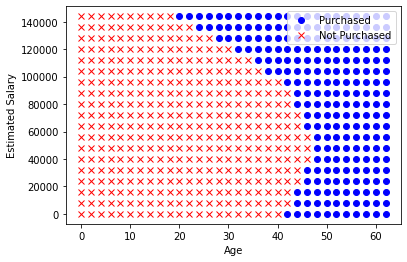

In [18]:


prebayyes = data_bayes['Predicted Bayes Value'] == 1
prebayno = data_bayes['Predicted Bayes Value'] == 0

predyes = data_bayes[prebayyes] #ispurchased
predno = data_bayes[prebayno] #notpurchased


plt.plot(predyes.loc[:,"Age"], predyes.loc[:,"EstimatedSalary"], color='blue', marker='o',linestyle = "none", label = "Purchased" )
plt.plot(predno.loc[:,"Age"], predno.loc[:,"EstimatedSalary"], color='red', marker='x',linestyle = "none", label = "Not Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

Step 1 and Step 2
Step 1

Find a line

b0 + b1 * x + b2 * y = 0

Such that the line separates the data

One class should be on one side of the line and the other class should be on the other side of the line

HINT... If you calculate b0 + b1 * x + b2 * y for each (x,y) in each class, what do you notice?

Find the point in each class closest to your line

 

Step 2

Draw a grid

At each point (x,y) in the grid

Plot it as one class or the other based on which side of the line it is on

In [19]:
info = pd.read_csv ('data.csv')
info

,x,y,z
0,-1.50,2.00,0
1,-1.00,1.50,0
2,-0.75,3.00,0
3,-0.70,3.00,0
4,-0.75,1.00,0
5,-0.50,-0.25,0
6,-0.25,0.25,0
7,0.00,1.50,0
8,-0.05,1.50,0
9,-0.25,3.50,0


In [20]:
pred_1 = info['z'] == 1
pred_0 = info['z'] == 0

predyes = info[pred_1] #ispurchased
predno = info[pred_0] #notpurchased

In [21]:
def closestpoint(a,m,b):
    (x,y) = a
    m2 = -1/m
    b2 = y - (x*m2)
    x3 = ((b-b2)/(m2-m))
    y3 = x3 * m + b
    y4 = x3 * m2 + b2
    return((x3,y3))

print(str(closestpoint((-.5,-.25),1.08, -.12)))
print(str(closestpoint((.5,0),1.08, -.12)))


(-0.2956056129985229, -0.4392540620384047)
(0.29062038404726737, 0.19387001477104876)


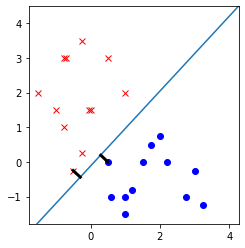

In [22]:


plt.plot(predyes.loc[:,"x"], predyes.loc[:,"y"], color='blue', marker='o',linestyle = "none", label = "1" )
plt.plot(predno.loc[:,"x"], predno.loc[:,"y"], color='red', marker='x',linestyle = "none", label = "0")
plt.axline((4, 4.2), slope=1.08)
x_points = [-0.2956056129985229,-.5]
y_points = [-0.4392540620384047,-.25]
plt.plot(x_points, y_points, color="black", linewidth=3)
x_points = [0.2956056129985229,.5]
y_points = [0.19387001477104876,0]
plt.plot(x_points, y_points, color="black", linewidth=3)

plt.gca().set_aspect('equal')
plt.show()


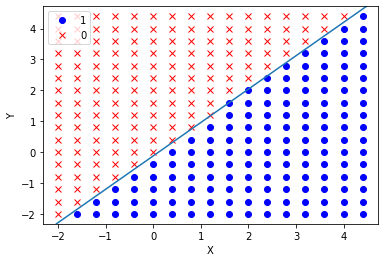

In [23]:
val = lambda a: 1.08 * a - .12
def predval(x,y):
    if (y < val(x)):
        return 1
    else:
        return 0

x_vals = [x/10 for x in range(-20,45,4) for z in range(-20,45,4)]
y_vals = [y/10  for z in range(-20,45,4) for y in range(-20,45,4)]  
z_vals = []
for x in range(len(x_vals)):
    z_vals.append(predval(x_vals[x],y_vals[x]))
    
step_2_frame = {'x' : list(x_vals), 'y' : list(y_vals), 'z' : z_vals}
step_2_frame = pd.DataFrame(step_2_frame)



prebayyes = step_2_frame['z'] == 1
prebayno = step_2_frame['z'] == 0

predyes = step_2_frame[prebayyes] #ispurchased
predno = step_2_frame[prebayno] #notpurchased


plt.plot(predyes.loc[:,"x"], predyes.loc[:,"y"], color='blue', marker='o',linestyle = "none", label = "1" )
plt.plot(predno.loc[:,"x"], predno.loc[:,"y"], color='red', marker='x',linestyle = "none", label = "0")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.axline((4, 4.2), slope=1.08)

PCA Plots

In [24]:
from sklearn import decomposition

In [25]:
def normalize(x_list, y_list):
    l = []
    x_mean = np.mean(x_list)
    y_mean = np.mean(y_list)
    x_sd = np.std(x_list)
    y_sd = np.std(y_list)
    for b in range(len(y_list)):
        l.append([(x_list[b] - x_mean)/x_sd,(y_list[b] - y_mean)/y_sd])
    return l

center = (np.mean(info.loc[:,"x"]),np.mean(info.loc[:,"y"]))

In [26]:

#
normalized_data = normalize(info.loc[:,"x"],info.loc[:,"y"])
X = np . array(normalized_data)
#
pca = decomposition . PCA(n_components = 2)
#
pca . fit(X)
#
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
#

[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]
[1.66890291 0.41805361]
[0.79968264 0.20031736]


In [27]:
normalized_data

[[-1.6844322497366688, 0.8915640386972842],
 [-1.299419164082573, 0.5524588575762887],
 [-1.1069126212555251, 1.5697744009392756],
 [-1.0684113126901156, 1.5697744009392756],
 [-1.1069126212555251, 0.21335367645529307],
 [-0.9144060784284773, -0.634409276347196],
 [-0.7218995356014295, -0.2953040952262004],
 [-0.5293929927743817, 0.5524588575762887],
 [-0.5678943013397912, 0.5524588575762887],
 [-0.7218995356014295, 1.908879582060271],
 [-0.1443799071202859, 1.5697744009392756],
 [0.24063317853380983, 0.8915640386972842],
 [-0.1443799071202859, -0.46485668578669814],
 [-0.06737728998946677, -1.1430670480286895],
 [0.24063317853380983, -1.482172229149685],
 [0.24063317853380983, -1.1430670480286895],
 [0.3946384127954481, -1.007424975580291],
 [0.6256462641879056, -0.46485668578669814],
 [0.8181528070149534, -0.12575150466570253],
 [1.0106593498420013, 0.04380108589479526],
 [1.1646645841036396, -0.46485668578669814],
 [1.5881789783231448, -1.1430670480286895],
 [1.9731920639772407, -1.

In [28]:
normalized_df = {'x': [a[0] for a in normalized_data], 'y': [b[1] for b in normalized_data], 'z' : info.loc[:,"z"]}
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,x,y,z
0,-1.684432,0.891564,0
1,-1.299419,0.552459,0
2,-1.106913,1.569774,0
3,-1.068411,1.569774,0
4,-1.106913,0.213354,0
5,-0.914406,-0.634409,0
6,-0.721900,-0.295304,0
7,-0.529393,0.552459,0
8,-0.567894,0.552459,0
9,-0.721900,1.908880,0


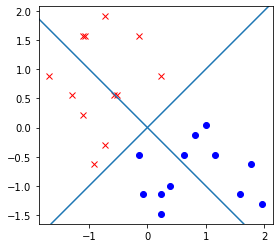

In [29]:
pred_1_normalized = normalized_df['z'] == 1
pred_0_normalized = normalized_df['z'] == 0

predyes_normalized = normalized_df[pred_1] #ispurchased
predno_normalized = normalized_df[pred_0] #notpurchased

plt.plot(predyes_normalized.loc[:,"x"], predyes_normalized.loc[:,"y"], color='blue', marker='o',linestyle = "none", label = "1" )
plt.plot(predno_normalized.loc[:,"x"], predno_normalized.loc[:,"y"], color='red', marker='x',linestyle = "none", label = "0")
center = (np.mean(normalized_df.loc[:,"x"]),np.mean(normalized_df.loc[:,"y"]))
plt.axline(center, slope=-1)
plt.axline(center, slope= 1)
plt.gca().set_aspect('equal')


In [30]:

from sklearn import svm

clf = svm.SVC( kernel = 'linear' , C = 100 )

xp = ([(info.loc[:,"x"][a],info.loc[:,"y"][a]) for a in range (len(info.loc[:,"y"]))])
yp = info.loc[:,"z"]

clf . fit(xp,yp)

print(clf.support_)

for j in clf.support_:
    print( j , xp[j] , yp[j] )

[ 5 11 12]
5 (-0.5, -0.25) 0
11 (1.0, 2.0) 0
12 (0.5, 0.0) 1


In [31]:
from shapely.geometry import Point
from shapely.geometry import LineString

point = Point(0.5, 0.0)
line = LineString([(-0.5, -0.25), (1.0, 2.0)])

x = np.array(point.coords[0])

u = np.array(line.coords[0])
v = np.array(line.coords[len(line.coords)-1])

n = v - u
n /= np.linalg.norm(n, 2)

P = u + n*np.dot(x - u, n)
print(P)

ModuleNotFoundError: No module named 'shapely'

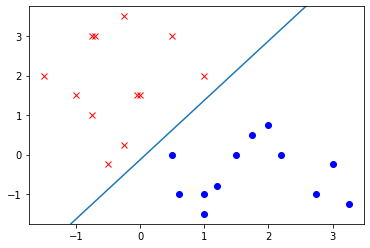

In [ ]:
m = 2.25/1.5
midpoint = (P[0]/2 + .25, P[1]/2 + 0)

pred_1 = info['z'] == 1
pred_0 = info['z'] == 0

predyes = info[pred_1] #ispurchased
predno = info[pred_0] #notpurchased

plt.plot(predyes.loc[:,"x"], predyes.loc[:,"y"], color='blue', marker='o',linestyle = "none", label = "1" )
plt.plot(predno.loc[:,"x"], predno.loc[:,"y"], color='red', marker='x',linestyle = "none", label = "0")
plt.axline(midpoint, slope=m)
# plt.gca().set_aspect('equal')
plt.show()

In [ ]:
#find equation
print("Slope: " + str(m))
b = midpoint[1] - midpoint[0]*m
print("B: " + str(b))
print("y = " + str(m) + " x + " + str(b))

Slope: 1.5
B: -0.125
y = 1.5 x + -0.125
